In [1]:
import yfinance as yf
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import datetime
plt.style.use("fivethirtyeight")

In [3]:
# Create Ticker variables
data = yf.Ticker("TSLA")
#Set the time range
data_hist = data.history(start=datetime.datetime(2010, 1, 1),end=datetime.datetime.today())
data_hist.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
2010-07-07 00:00:00-04:00,1.093333,1.108667,0.998667,1.053333,103825500,0.0,0.0
2010-07-08 00:00:00-04:00,1.076000,1.168000,1.038000,1.164000,115671000,0.0,0.0
2010-07-09 00:00:00-04:00,1.172000,1.193333,1.103333,1.160000,60759000,0.0,0.0
2010-07-12 00:00:00-04:00,1.196667,1.204667,1.133333,1.136667,33037500,0.0,0.0


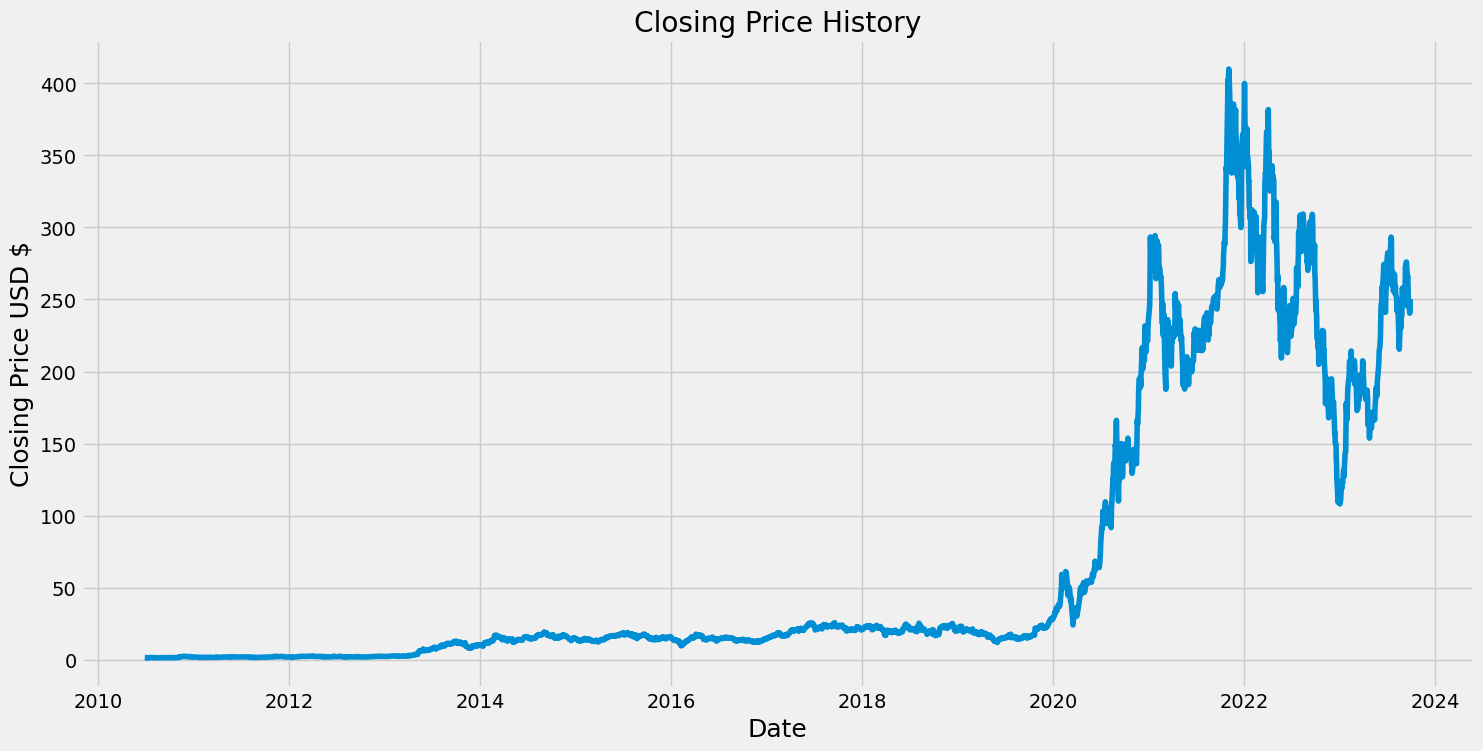

In [4]:
#Visualization of the Closing price
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(data_hist["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price USD $", fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the Adj Close Column
datadf = data_hist.filter(["Close"])
#Convert the dataframe to a numpy array
dataset = datadf.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) #This is use to train 80% of the dataset

training_data_len

2670

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
#Scaling the data means you are actually standardizing your data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.58556348],
       [0.59994295],
       [0.60933361]])

In [8]:
#Create the training model for the dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([1.31893362e-03, 1.30915180e-03, 1.00428027e-03, 5.54310805e-04,
       5.05407544e-05, 0.00000000e+00, 2.70634579e-04, 2.60852469e-04,
       2.03792057e-04, 3.81495574e-04, 6.58652434e-04, 6.66803171e-04,
       7.89077648e-04, 9.96129534e-04, 7.33645693e-04, 7.20604046e-04,
       8.47769140e-04, 8.95047734e-04, 8.39618402e-04, 7.74404629e-04,
       8.02119295e-04, 7.41799054e-04, 6.74953909e-04, 8.34727493e-04,
       1.00264919e-03, 8.90156824e-04, 7.58100530e-04, 6.17893497e-04,
       6.19524578e-04, 5.26596139e-04, 3.42368009e-04, 2.93458335e-04,
       4.10841611e-04, 4.85837203e-04, 5.46160067e-04, 4.84206122e-04,
       4.87468283e-04, 5.38006705e-04, 7.05931027e-04, 5.54310805e-04,
       6.68434252e-04, 6.43979415e-04, 6.35826345e-04, 6.63543343e-04,
       5.99960650e-04, 7.58100530e-04, 8.57551250e-04, 8.55919878e-04,
       7.72773549e-04, 8.31465041e-04, 8.00490546e-04, 7.12453017e-04,
       8.02119295e-04, 8.67333068e-04, 1.00754010e-03, 8.37987322e-04,
     

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reshape the data to a 3 dimensional shape
import numpy as np
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape
#Now you'll notice it a 3 dimensional shape

(2610, 60, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [18]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))#50 means the no of input neurons
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))# Final output

In [19]:
#Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [20]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)
#Batch size the number of Batch per training, while epochs is the number of Iteration

Epoch 1/5
2610/2610 [==============================] - 87s 32ms/step - loss: 6.4501e-04
Epoch 2/5
2610/2610 [==============================] - 78s 30ms/step - loss: 3.8594e-04
Epoch 3/5
2610/2610 [==============================] - 79s 30ms/step - loss: 1.2624e-04
Epoch 4/5
2610/2610 [==============================] - 77s 30ms/step - loss: 2.5403e-04
Epoch 5/5
2610/2610 [==============================] - 82s 32ms/step - loss: 1.5499e-04


In [21]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [22]:
#Convert the data to a numpy array
x_test = np.array(x_test)#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [23]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

21/21 [==============================] - 5s 77ms/step


In [25]:
#Evaluate the model: Getting the root square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

10.451461940691031

<ipython-input-27-fa07711ce8b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


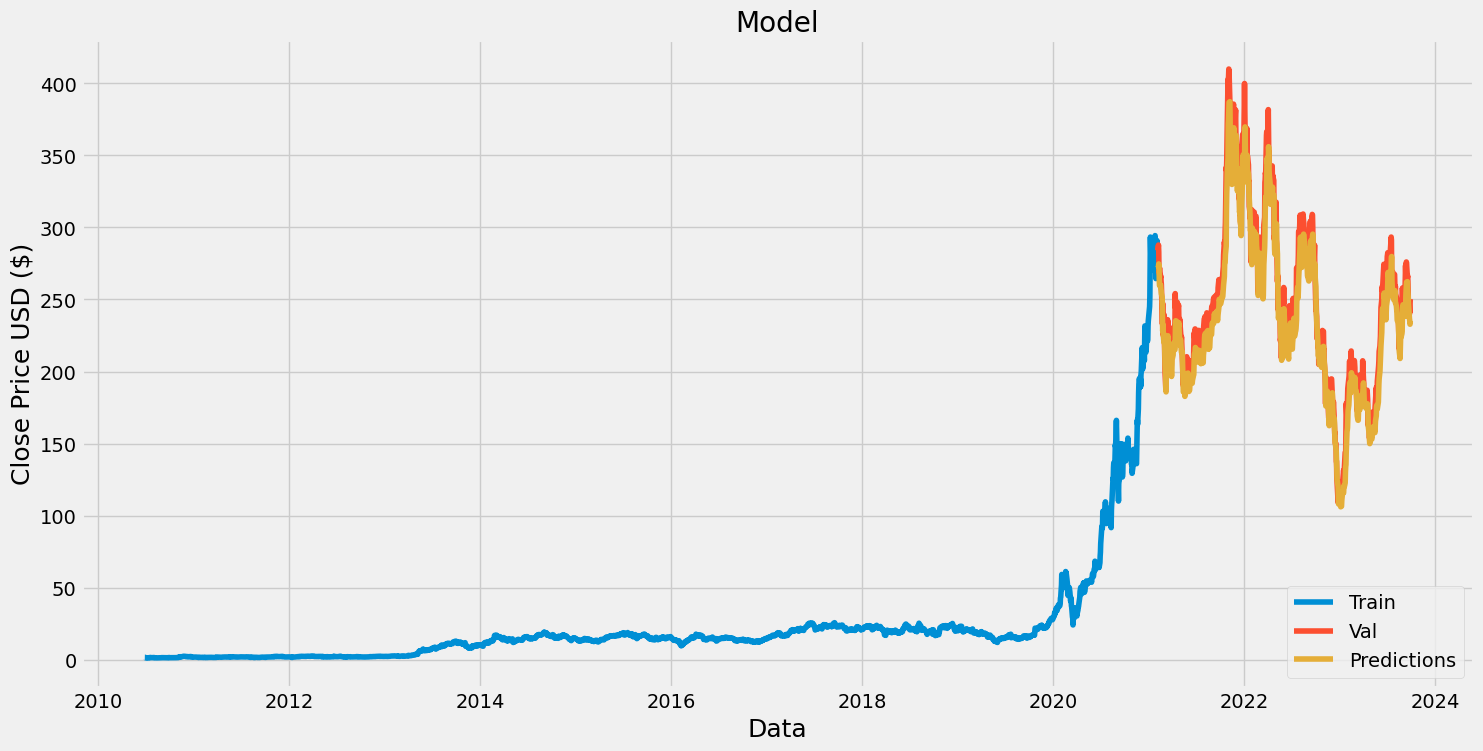

In [27]:
#Plot the data
train = datadf[:training_data_len]
valid = datadf[training_data_len:]
valid["Predictions"] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Data", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [28]:
#Show the valid and predicted prices
valid
#This compares between the "Close" and "Predictions"

,Close,Predictions
Date,,
2021-02-05 00:00:00-05:00,284.076660,273.963318
2021-02-08 00:00:00-05:00,287.806671,273.014099
2021-02-09 00:00:00-05:00,283.153320,274.721130
2021-02-10 00:00:00-05:00,268.273346,273.089813
2021-02-11 00:00:00-05:00,270.553345,263.381165
...,...,...
2023-09-25 00:00:00-04:00,246.990005,239.011307
2023-09-26 00:00:00-04:00,244.119995,236.606979
2023-09-27 00:00:00-04:00,240.500000,235.116226
